# VRSJ AC 2020
Plot


Masahiro Furukawa
Aug 30, 2020

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df =  pd.read_excel("jikkenr200fps60all.xlsx",sheet_name='jikkenr200fps60',header=0)

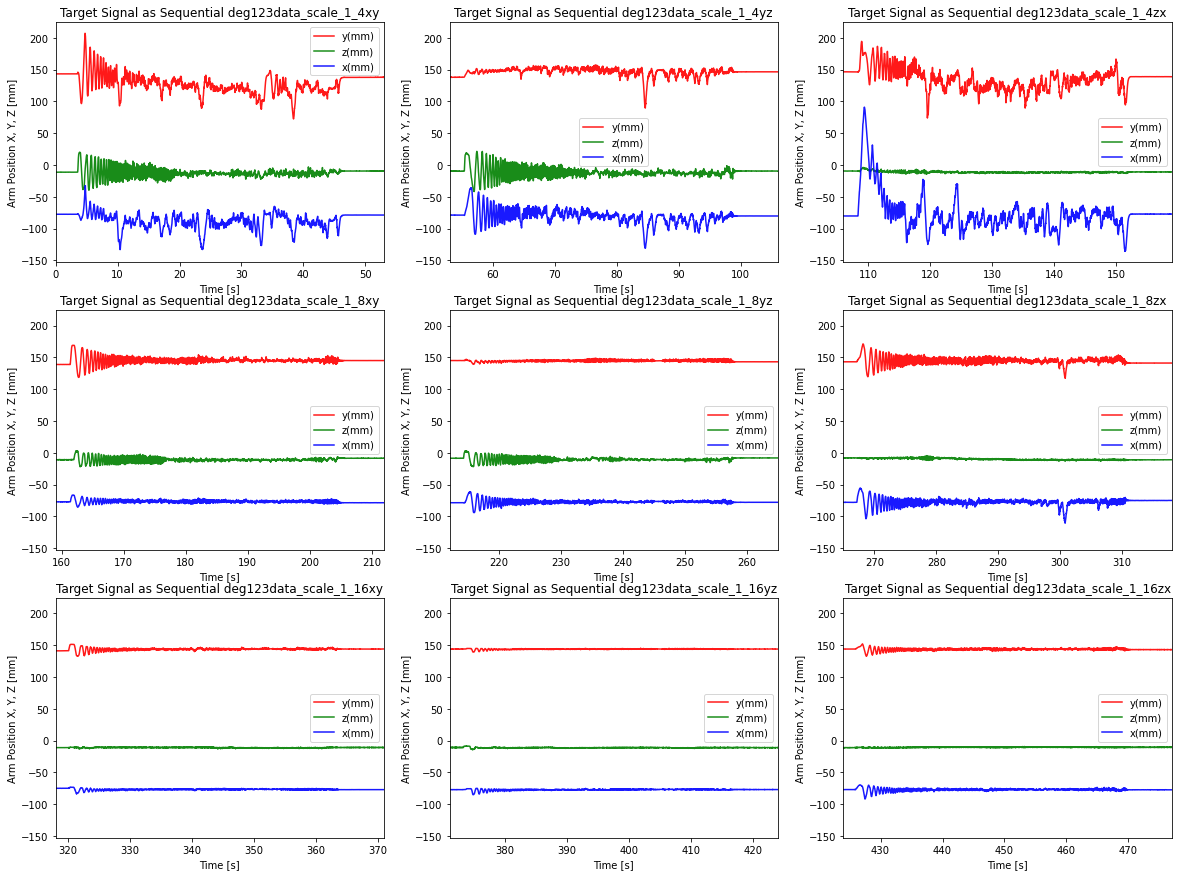

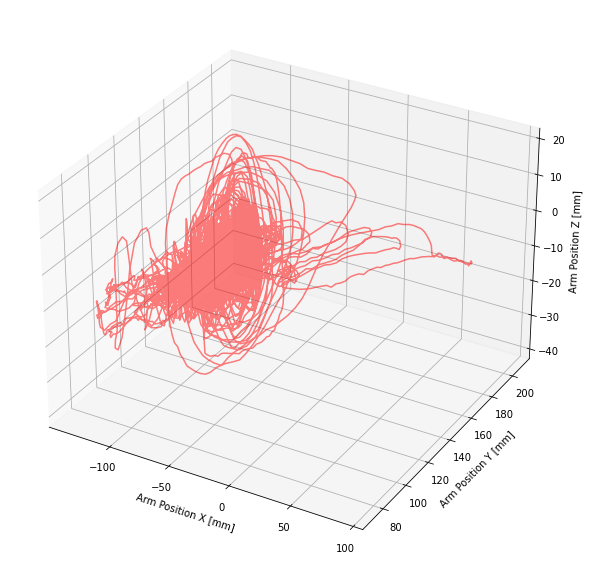

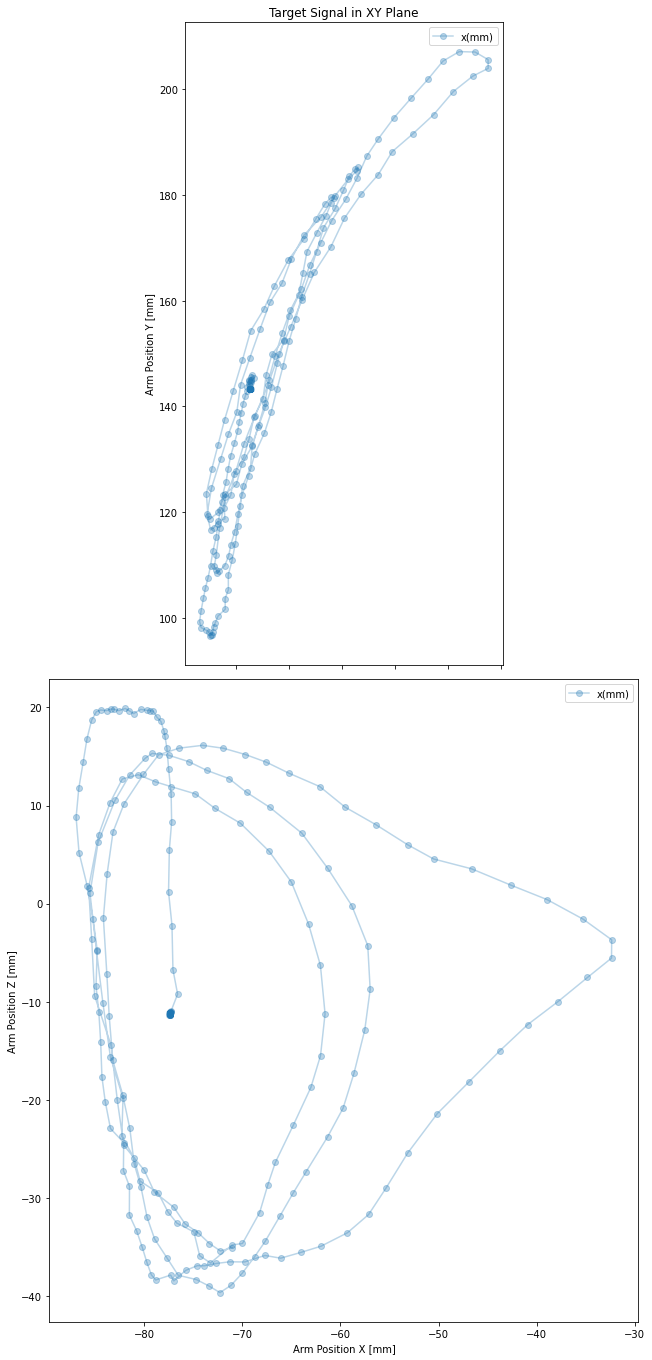

In [66]:
def setname(i):
    # implemented from 
    # https://github.com/maeda-lab/Scaledown/blob/master/simulation/simulation_realtime_Ji_sending/Source.cpp

    # Order of names created... 1/4xy,yz,zx 1/8xy,yz,zx  1/16xy,yz,zx
    # by using "if" ,"%",and "/"
    
    name = 'deg123data_scale_'

    if i % 3 == 0:
        space = "xy" 
        movespace = 0
    elif i % 3 == 1:
        space = "yz"
        movespace = 1
    else:
        space = "zx"
        movespace = 2

    if int(i / 3) == 0: 
        scalesize = "1_4"
        scale = 0.25
    elif int(i / 3) == 1:
        scalesize = "1_8"
        scale = 0.125
    else:
        scalesize = "1_16"
        scale = 0.0625

    return name + scalesize + space 

def plot_One(key_x, key_y, key_z):
    fps = 60
    n = len(df['x(mm)'])
    t = np.linspace(0,n,n)/fps
    
    deltaSec = 53
    
    nTrial = int(n/deltaSec/fps)
    
    fig = plt.figure(figsize=(20,15))
        
    for s in range(nTrial):
        
        str = setname(s)
        
        plt.subplot(3,3,s+1)
        plt.plot(t,df[key_y],'r-',alpha=0.9,label = key_y,markersize=3)
        plt.plot(t,df[key_z],'g-',alpha=0.9,label = key_z,markersize=3)
        plt.plot(t,df[key_x],'b-',alpha=0.9,label = key_x,markersize=3)
        plt.title('Target Signal as Sequential ' + str)
        plt.xlabel('Time [s]')
        plt.ylabel('Arm Position X, Y, Z [mm]')
#         plt.ylim([0,10])
        plt.xlim([s * deltaSec,s * deltaSec + deltaSec])
        plt.legend()

    
    fig = plt.figure(figsize=(10,19))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(df[key_x],df[key_y],df[key_z],'r',alpha=0.5)
    ax.set_xlabel('Arm Position X [mm]')
    ax.set_ylabel('Arm Position Y [mm]')
    ax.set_zlabel('Arm Position Z [mm]')
    
    f, (ax1, ax2) = plt.subplots(2,1,sharex='col', figsize=(10,19))
    
    ax1.plot(df[key_x][:400],df[key_y][:400],'o-',alpha=0.3,label = key_x)
    ax1.set_title('Target Signal in XY Plane')
    ax1.set_ylabel('Arm Position Y [mm]')
    ax1.legend()
    ax1.set_aspect('equal')

    ax2.plot(df[key_x][:400],df[key_z][:400],'o-',alpha=0.3,label = key_x)
    ax2.set_xlabel('Arm Position X [mm]')
    ax2.set_ylabel('Arm Position Z [mm]')
    ax2.legend()
    ax2.set_aspect('equal')

    plt.tight_layout()
    plt.show()
    
plot_One('x(mm)','y(mm)','z(mm)')